Company Bankruptcy Prediction using Random Forest
Author: Steve Musyoka
Field: Econometrics | Statistics | Data Science

Project Overview
This project builds a machine learning model to predict whether a company will go bankrupt based on financial ratios. 

In [1]:
#importing libarires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)

In [2]:
#loading the data into a data frame
df=pd.read_csv("C:/Users/musyo/Downloads/Datasets-20240315/data.csv")
print("df shape:",df.shape)
df.head()

df shape: (6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.columns.tolist()

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

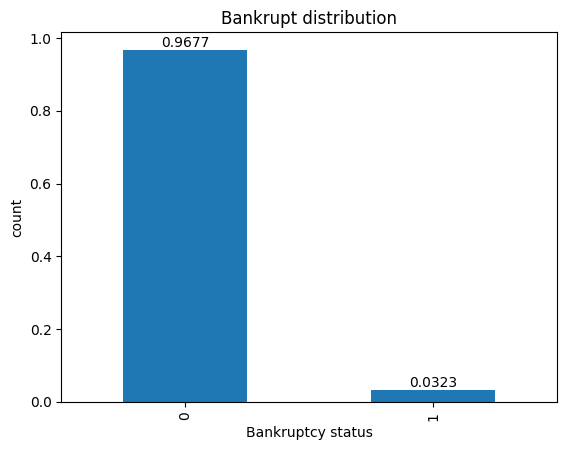

In [4]:
#checking if the data is unbalanced
fig,ax=plt.subplots()
df["Bankrupt?"].value_counts(normalize=True).plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container,fmt="%.4f");
plt.xlabel("Bankruptcy status")
plt.ylabel("count")
plt.title("Bankrupt distribution");

In [ ]:
df.isnull().sum()

In [5]:
#splitting the data into a target matrix and feature matrix
target="Bankrupt?"
X=df.drop(columns=[target])
y=df[target]
print("X Shape:",X.shape)
print("y Shape:",y.shape)

X Shape: (6819, 95)
y Shape: (6819,)


In [6]:
#splitting the data into a tranining set and testing set
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (5455, 95)
y_train: (5455,)
X_test: (1364, 95)
y_test: (1364,)


In [7]:
#over sampling the data to deal with the imbalance issue
over= RandomOverSampler(random_state=42)
X_train_over,y_train_over=over.fit_resample(X_train,y_train)
print("X_train_over:",X_train_over.shape)
print("y_train_over:",y_train_over.shape)

X_train_over: (10572, 95)
y_train_over: (10572,)


In [8]:
#bulding the baseline model
baseline=y_train.value_counts(normalize=True).max()
print("baseline:",round(baseline,4))

baseline: 0.969


In [9]:
#making a classifier which has a RandomForestClassifier
clf = make_pipeline(
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [10]:
#setting the different hyperparameters
params = {
    "randomforestclassifier__n_estimators": range(25,100,25),
     "randomforestclassifier__max_depth": range(10,50,10)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [11]:
#bulding the model using a GridSearch
model = GridSearchCV(
    clf,
    param_grid=params,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)
model,

(GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('randomforestclassifier',
                                         RandomForestClassifier(random_state=42))]),
              n_jobs=-1,
              param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                          'randomforestclassifier__n_estimators': range(25, 100, 25)},
              scoring='roc_auc', verbose=1),)

In [12]:
#tranining the model with our training data set
model.fit(X_train_over,y_train_over),

Fitting 5 folds for each of 12 candidates, totalling 60 fits


(GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('randomforestclassifier',
                                         RandomForestClassifier(random_state=42))]),
              n_jobs=-1,
              param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                          'randomforestclassifier__n_estimators': range(25, 100, 25)},
              scoring='roc_auc', verbose=1),)

In [13]:
#evaluating the model
acc_train=model.score(X_train_over,y_train_over)
acc_test=model.score(X_test,y_test)
print("acc_train:",round(acc_train,4))
print("acc_test:",round(acc_test,4))

acc_train: 1.0
acc_test: 0.8938


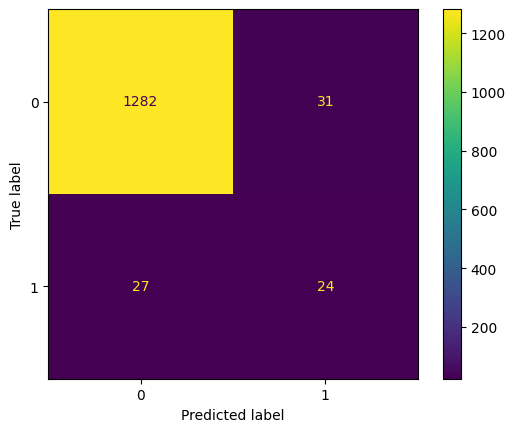

In [15]:
#presenting the results using a Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [17]:
# Print classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.44      0.47      0.45        51

    accuracy                           0.96      1364
   macro avg       0.71      0.72      0.72      1364
weighted avg       0.96      0.96      0.96      1364



In [18]:
def make_cnf_matrix(threshold):
    y_pred_proba=model.predict_proba(X_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_metrixs=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
thresh_widget = widgets.FloatSlider(min=0,max=1,value=0.5)
interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0), Output()), _dom_classes=('widg…

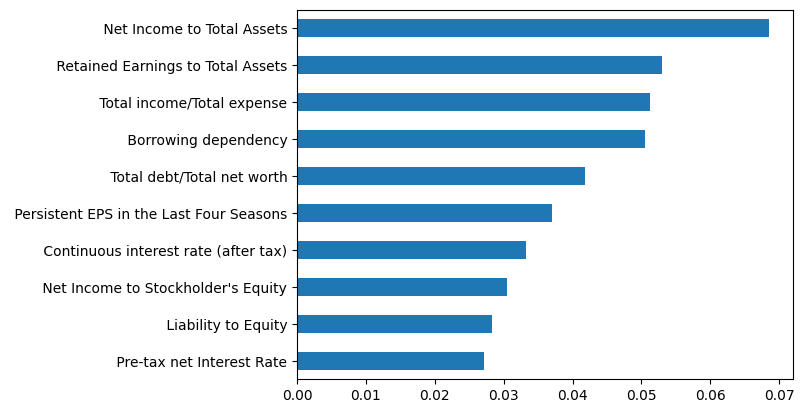

In [19]:
#printing the top 10 features in our data set
importance=model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
feat_imp=pd.Series(importance,index=X_train_over.columns).sort_values()
feat_imp.tail(10).plot(kind="barh");